# Homework 8

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 30th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Name: Christopher Hase

In [2]:
import numpy as np
import pymc3 as pm
from pymc3 import summary, sample_ppc, find_MAP, traceplot
import sklearn.model_selection
import pandas as pd
from matplotlib import pyplot as plt




## Problem 1: Understanding Yelp Review Data As a Human
In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 



Problem #1 is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](./yelp_reviews.zip) for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

### Part 1

The problem with labeling the restaurant as 'good' or 'bad' is that based on the reviews, there are clearly two components of the restaurant that need to be considered separately: food and service. The restaurant has several reviewers indicating that the restaurant has great sushi but terrible service. Examples of this can be seen in reviews 1 and 4. Describing this restaurant as 'good' or 'bad' does not capture the information provided in the reviewers' commentaries on the restaurant.

### Part 2

Review 1 - Food: Good, Service: Bad

Review 2 - Food: Good, Service: Bad

Review 3 - Food: Unknown, Service: Bad

Review 4 - Food: Good, Service: Bad

Review 5 - Food: Good, Service: Good

Review 6 - Food: Good, Service: Bad

Review 7 - Food: Good, Service: Good

Review 8 - Food: Good, Service: Good

Review 9 - Food: Unknown, Service: Bad

Review 10 - Food: Good, Service: Good

### Part 3

One problem is that some reviewers did not even try the sushi. For example, the reviewers who wrote reviews 3 and 9 did not eat at the restaurant. Another problem is that some reviewers hardly mention the service, making that aspect of some of the reviews of the restaurant difficult to evaluate. For example, reviewer 7 only mentions that "Ino just keeps making it and putting it in front of me" and reviewer 5 just says that "the chef is actually a really nice, happy, jokey guy."

### Part 4

Assuming we have labels (problems with obtaining these are mentioned in part 3), we would use supervised learning to accomplish these classification tasks. Specifically, we would perform two separate classification tasks for the two components we want to evaluate: food and service. Supervised learning models would take as input vectors based on the words in the reviews and learn a mapping to the labels. The important modeling considerations are how to represent the words in the reviews and how to create a model architecture that accounts for the relationships between the words in the reviews.

### Part 5

Step 1. For each review, read in the text as a string and split the string by word, so that we have a list of words for each review. 

Step 2. From these lists of words, create a vocabulary of unigrams and bigrams. That is, keep track of the unigrams and bigrams that occur at least once across all of the reviews. Note that we may not want to include certain unigrams and bigrams in our vocabulary due to low potential for helping to predict labels. For example, the bigram 'how to' is one that we may not want to include in our vocabulary.

Step 3. For each review, count the number of times each unigram and bigram from our vocabulary occurs to obtain a feature vector. That is, a component of the feature vectors will be the number of times that a unigram or bigram from our vocabulary was seen in a review.

Step 4. For each supervised learning task (food and service), use a logistic regression model and learn a mapping from the feature vectors to the labels. 

Step 5. Once the logistic regression models are fitted we can feed in a feature vector to each of them and output the estimated probabilities of good food and good service. If the estimated probability of good food/service is above 0.5, we say that the review indicated good food/service. If the estimated probability of good food/service is below 0.5, we say that the review indicated bad food/service.

## Problem 2: My Sister-In-Law's Baby Cousin Tracy ...


Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](./survey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in two ways. 


1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

For GP Regression, we can model the likelihood of knowing someone LGBTQ as a product of binomials -- one binomial distribution per age group. 

$$p(y_a | \theta_a, n_a) = Binom( y_a, n_a, \theta_a)$$

where $y_a$ (i.e. `knowlgbtq`) is the observed number of respondents who know someone lgbtq  at age $a$, $n_a$ (i.e. `numr`) is the number of trials and $\theta_a$ is the rate parameter for having an lgbtq acquaintance at age $a$.

Using the Gaussian approximation  (http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) to approximate the Binomial since `numr` is large, you can simply use a GP posterior with the error for each measurement to be given using this approximation. 

In [277]:
# read in data
survey = pd.read_csv('survey.csv')

# add ratio variable
survey['ratio'] = pd.Series(survey['knowlgbtq']/survey['numr'])

survey.head()

,age,numr,knowlgbtq,ratio
0,18,310,158,0.509677
1,19,221,118,0.533937
2,20,217,120,0.552995
3,21,255,131,0.513725
4,22,301,168,0.558140


### Part 1

In [355]:
# bayesian linear regression
# modeling proportion of those who know lgbtq using age
with pm.Model() as bayes_reg:
    
    priors = {'Intercept': pm.Normal.dist(mu=0, sd=10),
              'age': pm.Normal.dist(mu=0, sd=10)}
    
    pm.glm.GLM.from_formula('ratio ~ age', survey, family = pm.glm.families.Normal(), priors = priors)
    
    step = pm.step_methods.hmc.nuts.NUTS()
    
    bayes_reg_trace = pm.sampling.sample(draws = 10000, step = step, init = 'advi', tuning = 15000, chains = 1)

Sequential sampling (1 chains in 1 job)
NUTS: [sd_log__, age, Intercept]
100%|██████████| 10500/10500 [01:03<00:00, 166.57it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [465]:
# sampling from posterior predictive of bayesian linear regression model
with bayes_reg:
    bayes_post_pred_samples = pm.sample_ppc(bayes_reg_trace, samples=1000)

100%|██████████| 1000/1000 [00:01<00:00, 772.62it/s]


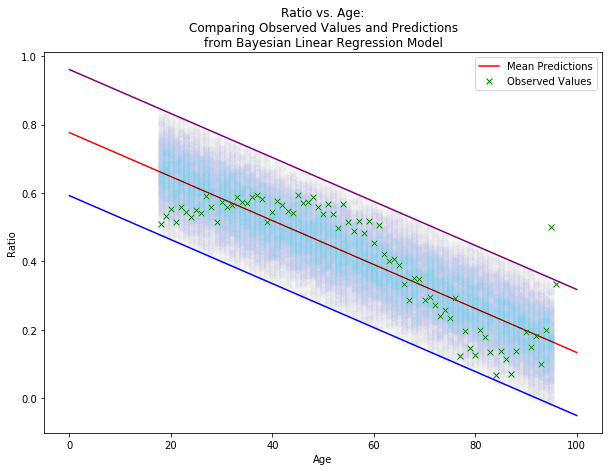

In [519]:
# plotting posterior predictive means and confidence interval bounds for bayesian regression model
trace_summary = summary(bayes_reg_trace[1000::10])
intercept = trace_summary['mean'][0]
age_coef = trace_summary['mean'][1]
sd = trace_summary['mean'][2]

pred_mean_ratios = np.zeros(101)
ratio_upper = np.zeros(101)
ratio_lower = np.zeros(101)

for i in range(101):
    pred_mean_ratios[i] = intercept + age_coef * i
    ratio_upper[i] = intercept + age_coef * i + 2 * sd
    ratio_lower[i] = intercept + age_coef * i - 2 * sd

plt.figure(figsize = (10, 7))
plt.plot(np.arange(101), pred_mean_ratios, color = 'red')

plt.plot(survey['age'], survey['ratio'], 'x', color = 'green')
for i in range(min(survey['age'].values), max(survey['age'].values)):
    samples = bayes_post_pred_samples['y'][:, i-min(survey['age'].values)]
    samples = samples[samples >= np.mean(samples) - 2*np.std(samples, ddof = 1)]
    samples_to_keep = samples[samples <= np.mean(samples) + 2*np.std(samples, ddof = 1)]
    plt.plot(np.repeat(i, len(samples_to_keep)), samples_to_keep, color = 'skyblue', marker = 'o', 
             alpha = 0.005)
    
plt.plot(np.arange(101), ratio_upper, color = 'purple')
plt.plot(np.arange(101), ratio_lower, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Ratio vs. Age:\nComparing Observed Values and Predictions\nfrom Bayesian Linear Regression Model')
plt.legend(loc = 'upper right', labels = ['Mean Predictions', 'Observed Values'])
plt.show()

### Part 2

In [408]:
# gaussian process model
# modeling proportion of those who know lgbtq using age
with pm.Model() as gp_reg:

    length = pm.HalfCauchy('length', 1)
    sigma = pm.HalfCauchy('sigma', 1)
    
    K = (sigma**2) * pm.gp.cov.ExpQuad(1, length) 
    
    noise_term = pm.HalfCauchy('noise_term', 1)
    
    ratio_gp = pm.gp.Marginal(cov_func=K)
    ratio_gp.marginal_likelihood('ratio', X=survey['age'].values.reshape(-1,1),
                                           y=survey['ratio'].values,
                                           noise=noise_term)

In [409]:
with gp_reg:
    step = pm.step_methods.hmc.nuts.NUTS()
    gp_trace = pm.sampling.sample(draws = 10000, step = step,\
                               init = 'advi', chains = 1)

Sequential sampling (1 chains in 1 job)
NUTS: [noise_term_log__, sigma_log__, length_log__]
100%|██████████| 10500/10500 [06:11<00:00, 28.30it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [502]:
# sampling from posterior predictive of gaussian process regression model
X_pred = np.linspace(0, 101, 101).reshape(-1, 1)
with gp_reg:
    gp_pred = ratio_gp.conditional('gp_pred8', X_pred)
    gp_post_pred_samples = pm.sample_ppc(gp_trace, vars=[gp_pred], samples=1000)

100%|██████████| 1000/1000 [00:11<00:00, 88.91it/s]


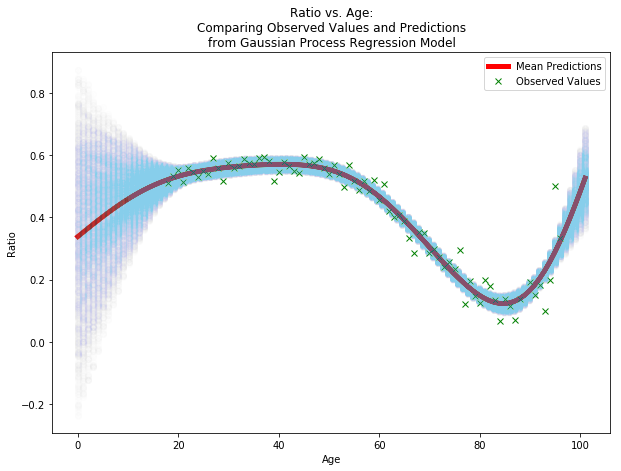

In [520]:
# plotting posterior predictive means and confidence interval bounds for gaussian process regression model
plt.figure(figsize = (10, 7))
post_pred_means = np.zeros(len(X_pred))
for i in range(len(X_pred)):
    post_pred_means[i] = np.mean(gp_post_pred_samples['gp_pred8'][:, i])
plt.plot(X_pred, post_pred_means, 'r', linewidth=5)
plt.plot(survey['age'], survey['ratio'], 'x', color = 'green')
    
for i in range(len(X_pred)):
    samples = gp_post_pred_samples['gp_pred8'][:, i]
    samples = samples[samples >= np.mean(samples) - 2*np.std(samples, ddof = 1)]
    samples_to_keep = samples[samples <= np.mean(samples) + 2*np.std(samples, ddof = 1)]
    plt.plot(np.repeat(X_pred[i], len(samples_to_keep)), samples_to_keep, color = 'skyblue', marker = 'o', 
             alpha = 0.007)

plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Ratio vs. Age:\nComparing Observed Values and Predictions\nfrom Gaussian Process Regression Model')
plt.legend(loc = 'upper right', labels = ['Mean Predictions', 'Observed Values'])
plt.show()

### Part 3

There is a non-linear relationship between age and likelihood of acquaintance with someone LGBTQ. The Gaussian process regression model does a much better job at capturing this non-linear relationship than the Bayesian linear regression model. For the Bayesian linear regression model, age does not affect the variances of the conditional posterior predictive distributions. For the Gaussian process regression model, the variances of the conditional posterior predictive distributions are much lower for ages for which there exists more data.

## Problem 3:  Like a Punch to the Kidneys 

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

- (#1) Implement Empirical Bayes via moment matching as described as follows. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet.  For this model, the prior-predictive is a negative binomial. Matching the mean and the variance of the negative binomial to that from the data, you can find appropriate expressions for $\alpha$ and $\beta$. (Hint: You need to be careful with the $5n_j$ multiplier.) 

- (#2) Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

(**Hint:** You might also find it helpful to follow the Rat Tumor example.)

(**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.) 

### Part 1

After a bunch of algebra, we get that $Y_i\sim NegBinom\Bigg(\alpha, \dfrac{1}{\frac{\beta}{5n_i}+1}\Bigg)$. Then $E(Y_i)=\dfrac{\alpha}{\frac{\beta}{5n_i}}$ and $Var(Y_i)=\dfrac{\alpha}{\bigg(\frac{\beta}{5n_i}\bigg)^2}+\dfrac{\alpha}{\bigg(\frac{\beta}{5n_i}\bigg)}$. The problem here is that we're interested in obtaining values for $\alpha$ and $\beta$ at the country level, but our mean and variance expressions include $n_i$. Note that $\dfrac{Y_i}{n_i}$ is a random variable that represents the county rate of kidney cancer mortality. Using this random variable instead of $Y_i$ helps us get rid of the $n_i$ in $E(Y_i)$. $E\bigg(\dfrac{Y_i}{n_i}\bigg)=\dfrac{5\alpha}{\beta}$. However, we still have $n_i$ in the variance expression for $\dfrac{Y_i}{n_i}$. $Var\bigg(\dfrac{Y_i}{n_i}\bigg)=\dfrac{5\alpha}{\beta^2}+\dfrac{5\alpha}{\beta n_i}$. Here it seems reasonable to substitute in $\bar{n}$ for $n_i$ where $\bar{n}=\dfrac{1}{N}\displaystyle\sum_{i=1}^{N}n_i$. Now we have $Var\bigg(\dfrac{Y_i}{n_i}\bigg)=\dfrac{5\alpha}{\beta^2}+\dfrac{5\alpha}{\beta \bar{n}}$.

Now we can obtain estimates for $\alpha$ and $\beta$ using the data through moment matching. Let $c_i$ be the observed kidney cancer mortality rate for county $i$. After some algebra, we get that $\hat{\alpha}=\dfrac{\bar{n}\bar{c}^2}{\bar{n}s^2-\bar{c}}$ and $\hat{\beta}=\dfrac{5\bar{n}\bar{c}}{\bar{n}s^2-\bar{c}}$ where $\bar{c}=\dfrac{1}{N}\displaystyle\sum_{i=1}^{N}c_i$, $\bar{c}^2=\Bigg(\dfrac{1}{N}\displaystyle\sum_{i=1}^{N}c_i\Bigg)^2$, and $s^2=\dfrac{1}{N-1}\displaystyle\sum_{i=1}^{N}(c_i-\bar{c})^2$.

The numerical estimates for $\alpha$ and $\beta$ are computed below.

In [261]:
# read in and view data
cancer = pd.read_csv('kcancer.csv')
cancer.columns = ['state', 'fips', 'county', 'countyfips', 'dc', 'pop', 'prop_mortality']
cancer.head()

,state,fips,county,countyfips,dc,pop,prop_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


In [317]:
# estimate alpha and beta
mean_prop = cancer['prop_mortality'].mean()
var_prop = np.var(cancer['prop_mortality'].values, ddof = 1)
mean_pop_size = cancer['pop'].mean()
alpha = (mean_pop_size * mean_prop**2)/(mean_pop_size * var_prop - mean_prop)
beta = (5* mean_pop_size * mean_prop)/(mean_pop_size * var_prop - mean_prop)
print('Estimate for alpha: ' + str(alpha))
print('Estimate for beta: ' + str(beta))

Estimate for alpha: 1.5445945866
Estimate for beta: 133464.150333


Now we have $\hat{\alpha}$ and $\hat{\beta}$ and our prior for $\theta_i$ is $\theta_i\sim Gamma(\hat{\alpha}, \hat{\beta})$. Note that $5n_i\theta_i\sim Gamma\bigg(\hat{\alpha}, \dfrac{\hat{\beta}}{5n_i}\bigg)$. Based on Gamma-Poisson conjugacy, we get $5n_i\theta_i\hspace{0.1cm}|\hspace{0.1cm}Y_i\sim Gamma\bigg(\hat{\alpha}+Y_i, \dfrac{\hat{\beta}}{5n_i}+1\bigg)$. Then $\theta_i\hspace{0.1cm}|\hspace{0.1cm}Y_i\sim Gamma\bigg(\hat{\alpha}+Y_i,\hat{\beta}+5n_i\bigg)$.

Finally, the posterior mean for $\theta_i$ is $E(\theta_i\hspace{0.1cm}|\hspace{0.1cm}Y_i)=\dfrac{\hat{\alpha}+Y_i}{\hat{\beta}+5n_i}$

Now we can compute posterior rates from the data.

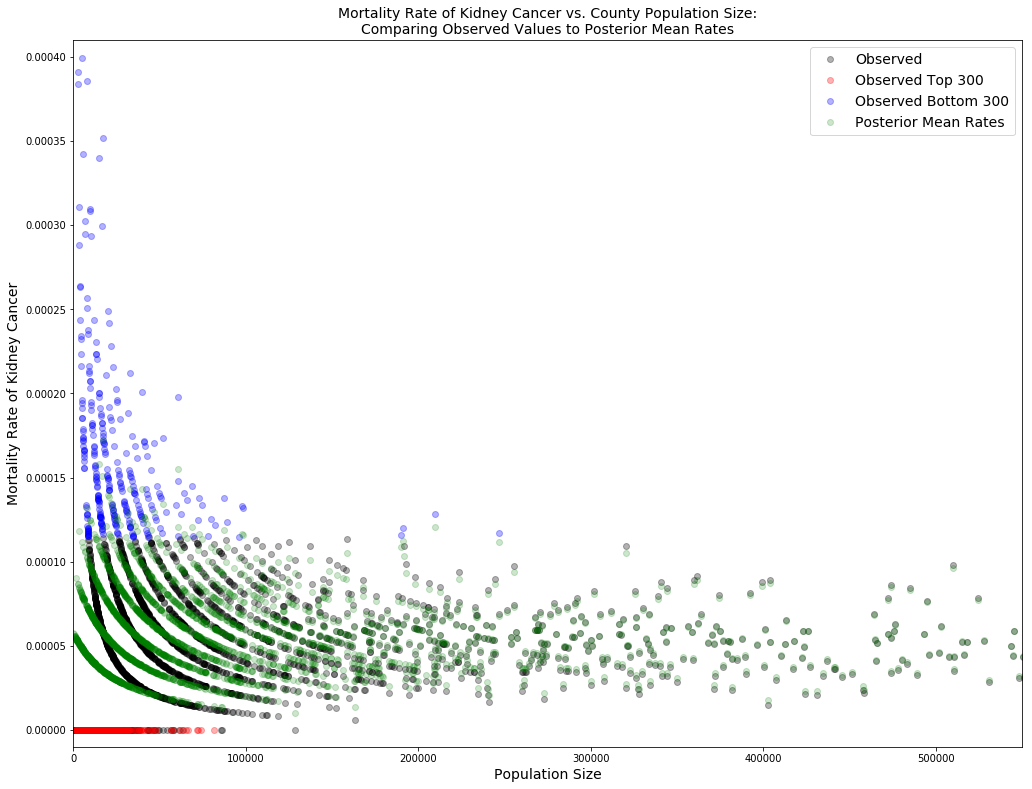

In [528]:
# compute posterior mean rates
posterior_mean_rates = 5*(cancer['dc'].values + alpha)/(5*cancer['pop'].values + beta)

# get top and bottom 300 observed mortality rates; get middle mortality rates as well
bottom300_mortality = np.sort(cancer['prop_mortality'].values)[:300]
top300_mortality = np.sort(cancer['prop_mortality'].values)[-300:]
middle_mortality = np.sort(cancer['prop_mortality'].values)[300:-300]

# get populations for top and bottom 300 morality rates; get populations for middle mortality rates as well
pop_bottom300_mortality = cancer['pop'].values[np.argsort(cancer['prop_mortality'].values)[:300]]
pop_top300_mortality = cancer['pop'].values[np.argsort(cancer['prop_mortality'].values)[-300:]]
pop_middle_mortality = cancer['pop'].values[np.argsort(cancer['prop_mortality'].values)[300:-300]]

# producing scatterplot
plt.figure(figsize=(17, 13))
plt.plot(pop_middle_mortality, middle_mortality, color = 'black', marker = 'o', linestyle = 'None', alpha = 0.3)
plt.plot(pop_bottom300_mortality, bottom300_mortality, 'ro', alpha = 0.3)
plt.plot(pop_top300_mortality, top300_mortality, 'bo', alpha = 0.3)
plt.plot(cancer['pop'].values, posterior_mean_rates, color = 'green', marker = 'o', linestyle = 'None', alpha = 0.2)
plt.xlim([0, 550000])
plt.ylim([-0.00001, 0.00041])
plt.xlabel('Population Size', fontsize = 14)
plt.ylabel('Mortality Rate of Kidney Cancer', fontsize = 14)
plt.title('Mortality Rate of Kidney Cancer vs. County Population Size:\nComparing Observed Values to Posterior Mean Rates',\
          fontsize = 14)
plt.legend(loc = 'upper right', labels = ['Observed', 'Observed Top 300', 'Observed Bottom 300', 'Posterior Mean Rates'],\
           fontsize = 14)
plt.show()

### Part 3

One reason that using posterior means is preferable is that the result is no zero-valued mortality rates. We do not actually believe that there are some counties in which no one will ever die from kidney cancer or it is not possible to die from kidney cancer, and we want the mortality rates to reflect that belief. Also, we do not see posterior means indicating mortality rates as high as those observed in some small counties. Again, we do not actually believe that those small counties have such high underlying kidney cancer mortality rates, and we want the mortality rates to reflect that belief as well.

## Problem 4: In the Blink of a Bayesian Iris

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](./iris.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Other Hints: also use theano.tensor.exp when you define the inverse logit to go from $\beta$ to $p$, and you might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).

Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.
2. Find the MAP and mean estimate for the posterior on the training set.
3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.

In [188]:
# read in data, format, and view
iris = pd.read_csv('iris.csv')
iris = pd.get_dummies(iris).iloc[:, [0,1,2,3,6]]
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'virginica']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [189]:
# get train, test split
train, test = sklearn.model_selection.train_test_split(iris, test_size = 0.4, train_size=0.6, 
                                                       random_state=1, 
                                                       stratify=iris['virginica'])

### Part 1

$p\big(\mathbf{\beta}|\mathbf{X},\mathbf{Y}\big)=\dfrac{p\big(\mathbf{Y}|\mathbf{X},\mathbf{\beta}\big)\cdot p(\mathbf{\beta})}{\int p\big(\mathbf{Y}|\mathbf{X},\mathbf{\beta}\big)\cdot p(\mathbf{\beta})\cdot d\mathbf{\beta}}=\dfrac{\displaystyle\prod_{i=1}^n\bigg(\dfrac{1}{1+\exp(-\mathbf{x}_i^T\beta)}\bigg)^{y_i}\cdot \bigg(\dfrac{\exp(-\mathbf{x}_i^T\beta)}{1+\exp(-\mathbf{x}_i^T\beta)}\bigg)^{1-y_i}\cdot \mathcal{N}\big(\beta|0,100\mathbf{I}\big)}{\displaystyle\int\displaystyle\prod_{i=1}^n\bigg(\dfrac{1}{1+\exp(-\mathbf{x}_i^T\beta)}\bigg)^{y_i}\cdot \bigg(\dfrac{\exp(-\mathbf{x}_i^T\beta)}{1+\exp(-\mathbf{x}_i^T\beta)}\bigg)^{1-y_i}\cdot \mathcal{N}\big(\beta|0,100\mathbf{I}\big)\cdot d\beta}$

### Part 2

In [207]:
# bayesian logit
with pm.Model() as bayes_logit:
    
    priors = {'Intercept': pm.Normal.dist(mu=0, sd=10),
              'sepal_length': pm.Normal.dist(mu=0, sd = 10),
              'sepal_width': pm.Normal.dist(mu=0, sd = 10),
              'petal_length': pm.Normal.dist(mu=0, sd = 10),
              'petal_width': pm.Normal.dist(mu=0, sd = 10)}
    
    pm.glm.GLM.from_formula('virginica ~ sepal_length + sepal_width + petal_length + petal_width', 
                            train, family = pm.glm.families.Binomial(), priors = priors)
    
    step = pm.step_methods.hmc.nuts.NUTS()
    
    bayes_logit_trace = pm.sampling.sample(draws = 20000, step = step, init = 'advi',
                                           compute_convergence_checks = False, chains = 1, tuning = 10000,
                                           target_accept=0.95)

Sequential sampling (1 chains in 1 job)
NUTS: [petal_width, petal_length, sepal_width, sepal_length, Intercept]
100%|██████████| 20500/20500 [06:32<00:00, 52.24it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [208]:
# get MAP and posterior mean estimates
map_estimate = find_MAP(model=bayes_logit)
posterior_df = pd.DataFrame(map_estimate, index = np.arange(1)).transpose()
posterior_df['Posterior Mean'] = pd.Series(summary(bayes_logit_trace[100::10])['mean'])
posterior_df.columns = ['MAP', 'Posterior Mean']
posterior_df

logp = -22.628, ||grad|| = 0.001817: 100%|██████████| 44/44 [00:00<00:00, 719.36it/s]  


,MAP,Posterior Mean
Intercept,-10.427863,-12.806764
petal_length,5.153911,7.146016
petal_width,8.829345,10.957788
sepal_length,-2.431922,-3.439488
sepal_width,-4.888161,-6.470402


### Part 3

Note that the sampler was implemented in part 2 to estimate the posterior mean for $\beta$.

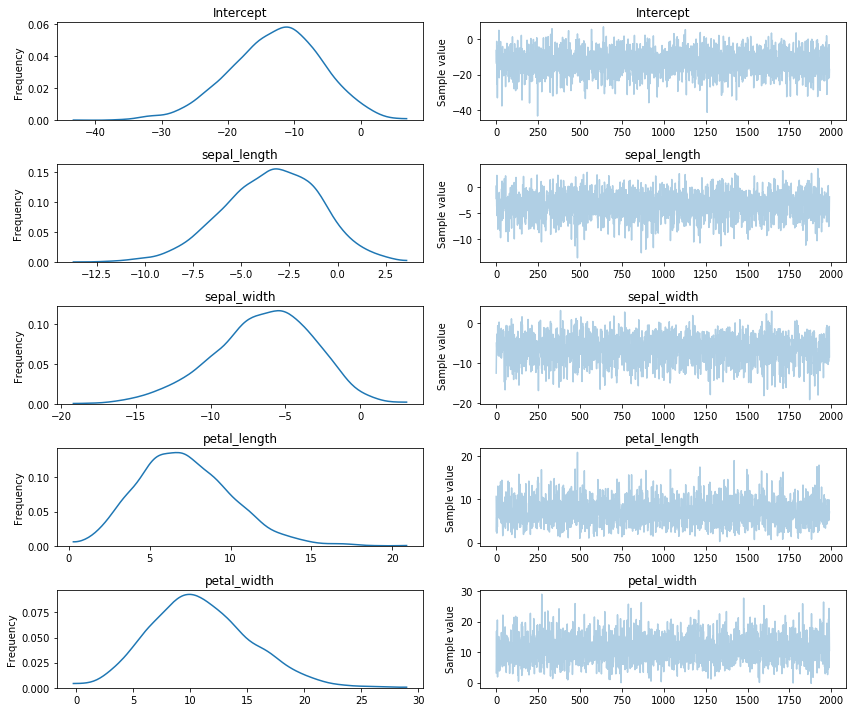

In [526]:
# traceplot and estimated posterior pdf for each component of beta
traceplot(bayes_logit_trace[100::10])
plt.show()

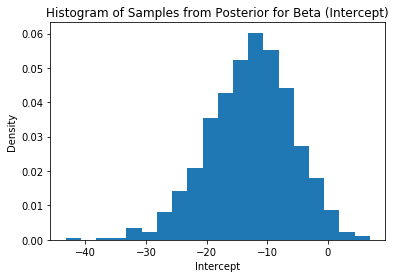

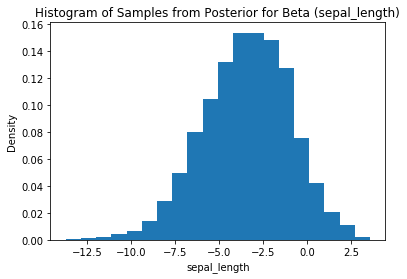

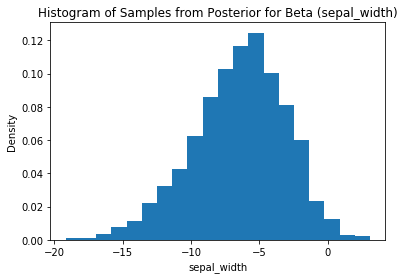

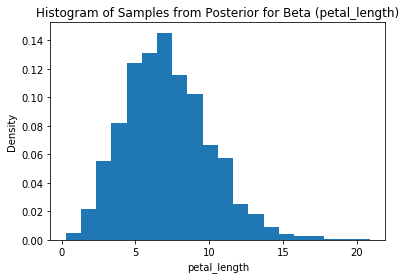

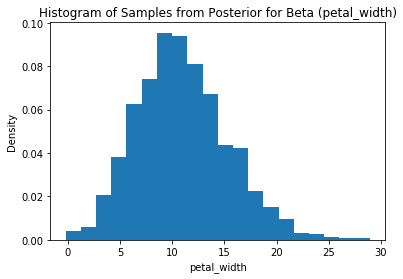

In [210]:
# plotting histograms of samples from posterior of beta for each component

plt.hist(bayes_logit_trace[100::10]['Intercept'], bins = 20, density = True)
plt.title('Histogram of Samples from Posterior for Beta (Intercept)')
plt.xlabel('Intercept')
plt.ylabel('Density')
plt.show()

plt.hist(bayes_logit_trace[100::10]['sepal_length'], bins = 20, density = True)
plt.title('Histogram of Samples from Posterior for Beta (sepal_length)')
plt.xlabel('sepal_length')
plt.ylabel('Density')
plt.show()

plt.hist(bayes_logit_trace[100::10]['sepal_width'], bins = 20, density = True)
plt.title('Histogram of Samples from Posterior for Beta (sepal_width)')
plt.xlabel('sepal_width')
plt.ylabel('Density')
plt.show()

plt.hist(bayes_logit_trace[100::10]['petal_length'], bins = 20, density = True)
plt.title('Histogram of Samples from Posterior for Beta (petal_length)')
plt.xlabel('petal_length')
plt.ylabel('Density')
plt.show()

plt.hist(bayes_logit_trace[100::10]['petal_width'], bins = 20, density = True)
plt.title('Histogram of Samples from Posterior for Beta (petal_width)')
plt.xlabel('petal_width')
plt.ylabel('Density')
plt.show()